In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

In [2]:
# 書くフォルダの重みを確認
# https://note.nkmk.me/python-rjust-center-ljust/
print("File Size")
for f in os.listdir('../csv'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('../csv/' + f) / 1000000, 2)) + 'MB')

File Size
test.csv                      314.02MB
sample_submission.csv         22.35MB
train.csv                     63.4MB


## データ確認

In [3]:
df_train = pd.read_csv('../csv/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
print("全体数 : {}".format(len(df_train)))
print("複製ペア： {}%".format(round(df_train['is_duplicate'].mean()*100, 2)))

全体数 : 404290
複製ペア： 36.92%


In [5]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print("質問総数： {}".format(len(np.unique(qids))))
print("複数回現れる質問総数： {}".format(np.sum(qids.value_counts() > 1)))

質問総数： 537933
複数回現れる質問総数： 111780


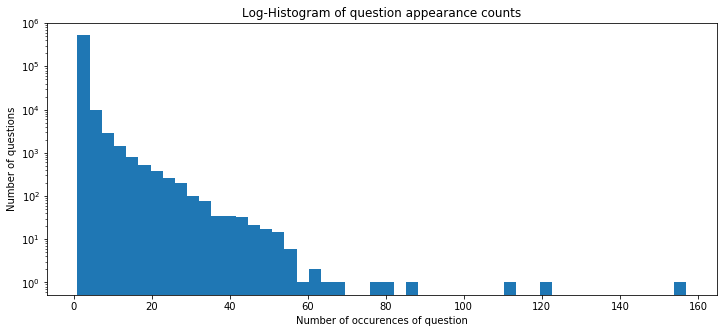

In [6]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

## テストデータ

In [7]:
df_test = pd.read_csv("../csv/test.csv")
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [8]:
print("すべてのテスト数 : {}".format(len(df_test)))

すべてのテスト数 : 2345796


In [14]:
# question1とquestion2をくっつける
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

In [16]:
dist_train = train_qs.apply(len)
dist_train.head()

0    66
1    51
2    73
3    50
4    76
dtype: int64

In [18]:
dist_test = test_qs.apply(len)
dist_test.head()

0    57
1    66
2    60
3    27
4    32
dtype: int64

mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


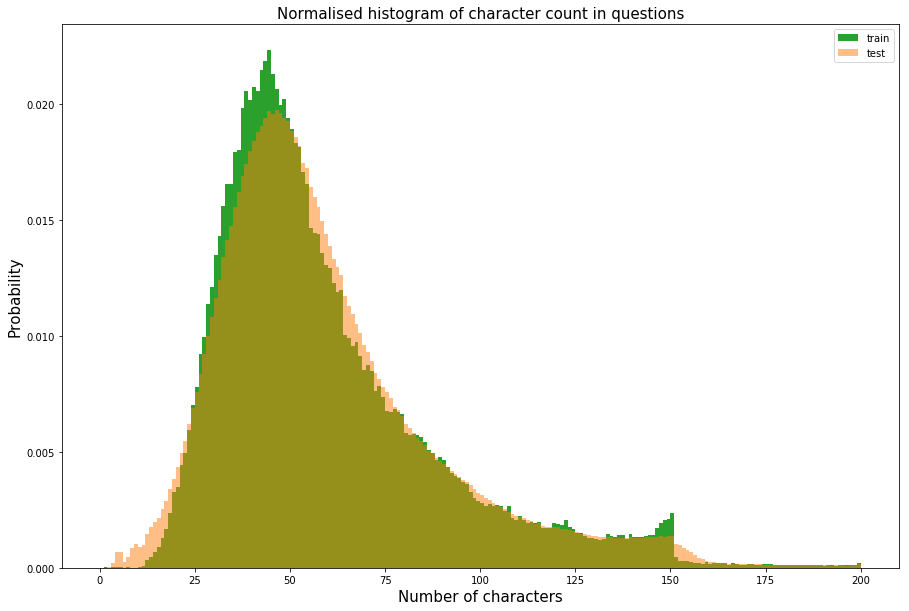

In [27]:
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

### 上記からわかること
質問の文字数は、15〜100文字あたりが一番多い。
１150文字以降になると急に数が少なくなっている。
これはQuoraでは、文字数制限がされているせいなのか？

In [42]:
dist_train = train_qs.apply(lambda x: x.split(' '))
dist_test = test_qs.apply(lambda x: x.split(' '))
dist_test.head()

0    [How, does, the, Surface, Pro, himself, 4, com...
1    [Should, I, have, a, hair, transplant, at, age...
2    [What, but, is, the, best, way, to, send, mone...
3                     [Which, food, not, emulsifiers?]
4                [How, "aberystwyth", start, reading?]
dtype: object

Text(0.5,0,'Number of words')

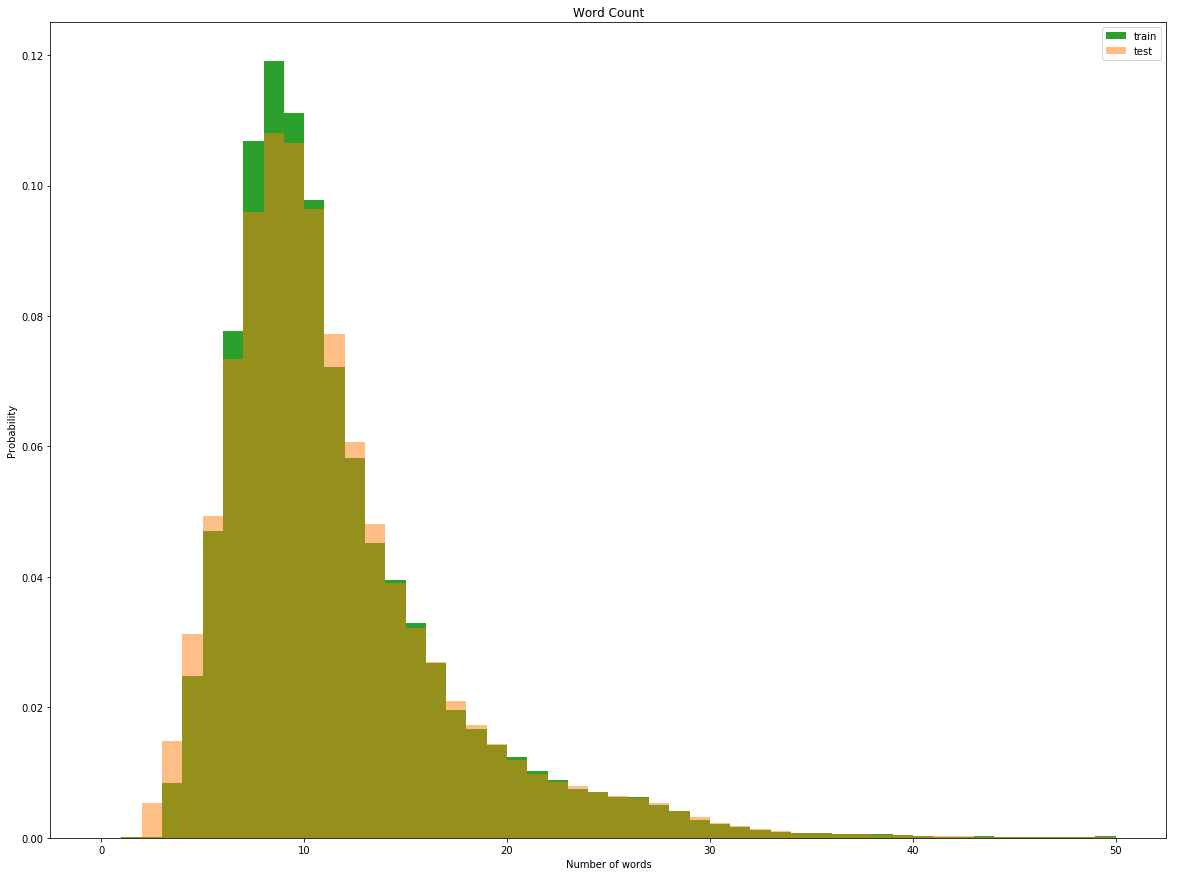

In [51]:
plt.figure(figsize=(20, 15))

plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
# alpha : 透過率
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')

plt.title('Word Count')
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of words')

## どんな言葉がもっとも使用されているか確認する

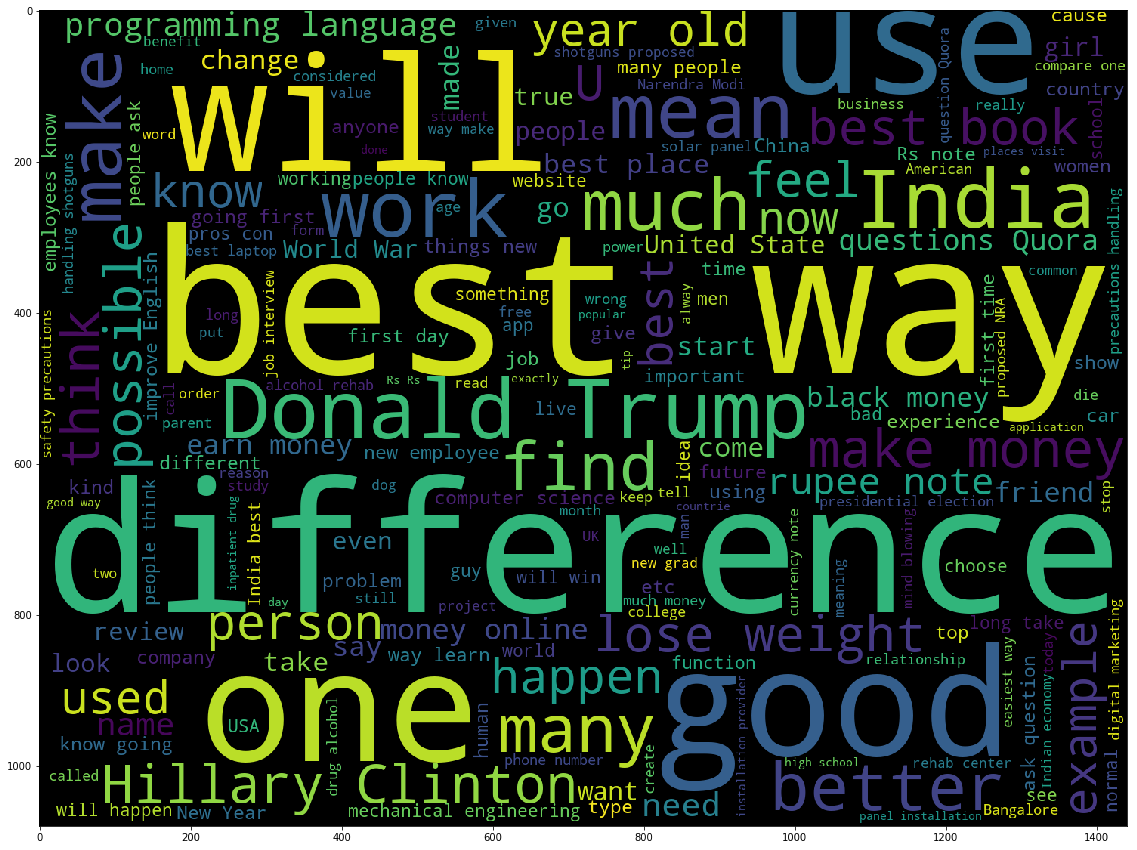

In [56]:
from wordcloud import WordCloud

cloud = WordCloud(width=1440, height=1080).generate("".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)

## 特徴分析

In [62]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r